In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics

df=pd.read_csv('/Users/da_learner_mac_45/Downloads/myupdateddata.csv',parse_dates=True)
df.tail(3)

,Unnamed: 0.1,Unnamed: 0,Date Time Hour Beginning,Original Res Forecast before Lockdown,Residual Forecast,RSA Contracted Forecast,Dispatchable Generation,Residual Demand,RSA Contracted Demand,International Exports,...,Total RE Installed Capacity,Installed Eskom Capacity,Total PCLF,Total UCLF,Total OCLF,Total UCLF+OCLF,Non Comm Sentout,Drakensberg Gen Unit Hours,Palmiet Gen Unit Hours,Ingula Gen Unit Hours
43821,43821,43821,2023-03-31 21:00:00,0.0,24646.570,26030.785,24414.863393,24617.793193,26091.469545,1586.088402,...,4660.168154,45319.336728,4699.612693,10094.312877,994.209083,11088.022836,455.353756,644.361216,82.698478,42.852417
43822,43822,43822,2023-03-31 22:00:00,0.0,23384.907,24597.115,24414.863393,24617.793193,26091.469545,1586.088402,...,4660.168154,45319.336728,4699.612693,10094.312877,994.209083,11088.022836,455.353756,644.361216,82.698478,42.852417
43823,43823,43823,2023-03-31 23:00:00,0.0,22313.206,23446.158,24414.863393,24617.793193,26091.469545,1586.088402,...,4660.168154,45319.336728,4699.612693,10094.312877,994.209083,11088.022836,455.353756,644.361216,82.698478,42.852417


In [69]:
from sklearn.feature_selection import SelectKBest, f_classif


import warnings
warnings.filterwarnings('ignore')

uni = SelectKBest(score_func = f_classif, k = 10)
X = df.drop(labels=['Residual Forecast', 'Date Time Hour Beginning'], axis=1)
y=df['Residual Forecast']
fit = uni.fit(X, y)
X.columns[fit.get_support(indices=True)].tolist()

['RSA Contracted Forecast',
 'Dispatchable Generation',
 'Residual Demand',
 'RSA Contracted Demand',
 'Thermal Generation',
 'Eskom Gas Generation',
 'ILS Usage',
 'Eskom Gas SCO',
 'Pumped Water SCO Pumping',
 'Other RE Installed Capacity']

In [70]:
#Selecting features with high covariancce
X.columns[fit.get_support(indices=True)].tolist()
cor = df.corr()
cor_target = abs(cor["Residual Forecast"])
relevant_features = cor_target[cor_target > 0.7]
relevant_features.index

Index(['Residual Forecast', 'RSA Contracted Forecast',
       'Dispatchable Generation', 'Residual Demand', 'RSA Contracted Demand',
       'Thermal Generation'],
      dtype='object')

In [71]:
df1=df[['Date Time Hour Beginning','RSA Contracted Forecast','Dispatchable Generation','Residual Demand','RSA Contracted Demand','Thermal Generation']]
df1

,Date Time Hour Beginning,RSA Contracted Forecast,Dispatchable Generation,Residual Demand,RSA Contracted Demand,Thermal Generation
0,2018-04-01 00:00:00,20367.066,20237.000000,20237.000000,20722.058000,19444.000000
1,2018-04-01 01:00:00,19988.733,19744.000000,19744.000000,20188.493000,19297.000000
2,2018-04-01 02:00:00,19731.239,19631.000000,19631.000000,20019.603000,19165.000000
3,2018-04-01 03:00:00,19753.554,19731.000000,19731.000000,20079.454000,19279.000000
4,2018-04-01 04:00:00,19988.365,19890.000000,19890.000000,20237.490000,19369.000000
...,...,...,...,...,...,...
43819,2023-03-31 19:00:00,29314.632,24414.863393,24617.793193,26091.469545,21712.483811
43820,2023-03-31 20:00:00,27605.215,24414.863393,24617.793193,26091.469545,21712.483811
43821,2023-03-31 21:00:00,26030.785,24414.863393,24617.793193,26091.469545,21712.483811
43822,2023-03-31 22:00:00,24597.115,24414.863393,24617.793193,26091.469545,21712.483811


In [72]:
print(df['Date Time Hour Beginning'].dtype)

object


In [73]:
import warnings
warnings.filterwarnings('ignore')

# Create a sample DataFrame
#df = pd.DataFrame(df['Date Time Hour Beginning'])

# Convert column to datetime64 and remove time portion
df1['Date Time Hour Beginning'] = pd.to_datetime(df['Date Time Hour Beginning']).dt.date

# Reset index
df1.reset_index(drop=True, inplace=True)

# Print the DataFrame with converted datetime64 column and removed time portion
(df1)


,Date Time Hour Beginning,RSA Contracted Forecast,Dispatchable Generation,Residual Demand,RSA Contracted Demand,Thermal Generation
0,2018-04-01,20367.066,20237.000000,20237.000000,20722.058000,19444.000000
1,2018-04-01,19988.733,19744.000000,19744.000000,20188.493000,19297.000000
2,2018-04-01,19731.239,19631.000000,19631.000000,20019.603000,19165.000000
3,2018-04-01,19753.554,19731.000000,19731.000000,20079.454000,19279.000000
4,2018-04-01,19988.365,19890.000000,19890.000000,20237.490000,19369.000000
...,...,...,...,...,...,...
43819,2023-03-31,29314.632,24414.863393,24617.793193,26091.469545,21712.483811
43820,2023-03-31,27605.215,24414.863393,24617.793193,26091.469545,21712.483811
43821,2023-03-31,26030.785,24414.863393,24617.793193,26091.469545,21712.483811
43822,2023-03-31,24597.115,24414.863393,24617.793193,26091.469545,21712.483811


Text(0.5, 1.0, 'Energy distribution')

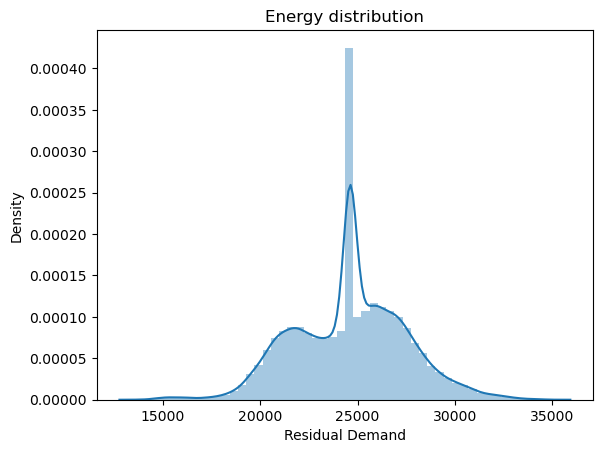

In [74]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(df1['Residual Demand'])
plt.title('Energy distribution')

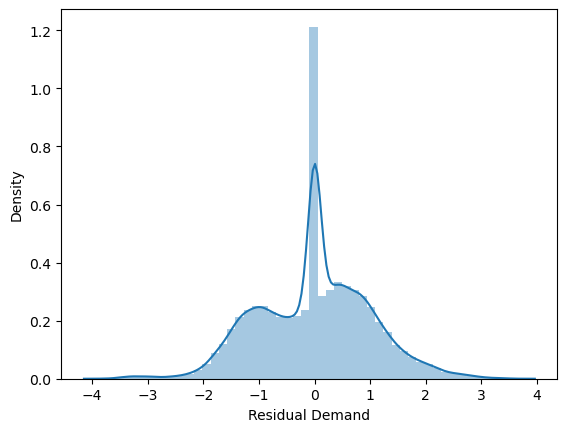

In [75]:
# Normalize the data using NumPy
normalized_data = (df1['Residual Demand'] - df1['Residual Demand'].mean()) / df1['Residual Demand'].std()

# Create a distribution plot using Seaborn
sns.distplot(normalized_data)

# Show the plot
plt.show()

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb


df1=df.drop('Date Time Hour Beginning',axis=1)
X=df1.drop('Residual Demand',axis=1)
#y=df1['Residual Demand']
y=normalized_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for XGBoost input
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters for XGBoost model
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',  # Loss function to optimize
    'eta': 0.1,  # Learning rate
    'max_depth': 5,  # Maximum depth of decision trees
    'subsample': 0.8,  # Subsample ratio for each tree
    'colsample_bytree': 0.8,  # Feature subsampling ratio for each tree
    'seed': 42  # Seed for reproducibility
}
# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
params['objective'] = 'reg:squarederror'  # Update objective for regression
model = xgb.train(params, dtrain, num_rounds)
y_pred = model.predict(dtest)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error for training data: {mse:.5f}')
print(f'Model score: {r2:.5f}')



Mean Squared Error for training data: 0.00080
Model score: 0.99920
